# HW 0 - Intro to Pandas
Credit: https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html


In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

## Object Creation


Creating a Series by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:

In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.744343,-1.188422,-0.720113,-0.203296
2013-01-02,-2.434880,-1.973303,-0.800716,-0.442497
2013-01-03,-1.625046,0.069265,-1.710835,0.520993
2013-01-04,1.160409,-0.766924,-0.428397,0.293153
2013-01-05,-0.123803,-1.525999,0.370063,-1.351938
2013-01-06,-0.912219,0.770129,-1.051823,-0.117604


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [5]:
df2 = pd.DataFrame({'A': 1.,
                     'B': pd.Timestamp('20130102'),
                     'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                     'D': np.array([3] * 4, dtype='int32'),
                     'E': pd.Categorical(["test", "train", "test", "train"]),
                     'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting DataFrame have different dtypes.

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing Data

View the top and bottom rows of the frame:

In [7]:
df.head()

,A,B,C,D
2013-01-01,-0.744343,-1.188422,-0.720113,-0.203296
2013-01-02,-2.434880,-1.973303,-0.800716,-0.442497
2013-01-03,-1.625046,0.069265,-1.710835,0.520993
2013-01-04,1.160409,-0.766924,-0.428397,0.293153
2013-01-05,-0.123803,-1.525999,0.370063,-1.351938


In [8]:
df.tail(3)

,A,B,C,D
2013-01-04,1.160409,-0.766924,-0.428397,0.293153
2013-01-05,-0.123803,-1.525999,0.370063,-1.351938
2013-01-06,-0.912219,0.770129,-1.051823,-0.117604


Display the index, columns:

In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

DataFrame.to_numpy() gives a NumPy representation of the underlying data. Note that this can be an expensive operation when your DataFrame has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column. When you call DataFrame.to_numpy(), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being object, which requires casting every value to a Python object.

For df, our DataFrame of all floating-point values, DataFrame.to_numpy() is fast and doesn’t require copying data.

In [11]:
df.values

array([[-0.74434254, -1.18842242, -0.72011277, -0.20329596],
       [-2.43488026, -1.97330311, -0.80071599, -0.44249707],
       [-1.62504593,  0.06926491, -1.71083537,  0.52099328],
       [ 1.16040861, -0.76692437, -0.42839658,  0.29315336],
       [-0.12380323, -1.52599949,  0.37006345, -1.35193788],
       [-0.91221875,  0.77012947, -1.0518228 , -0.11760389]])

In [12]:
df2.values

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

.describe( ) shows a quick statistic summary of your data:

In [13]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.779980,-0.769209,-0.723637,-0.216865
std,1.238327,1.026735,0.688704,0.656337
min,-2.434880,-1.973303,-1.710835,-1.351938
25%,-1.446839,-1.441605,-0.989046,-0.382697
50%,-0.828281,-0.977673,-0.760414,-0.160450
75%,-0.278938,-0.139782,-0.501326,0.190464
max,1.160409,0.770129,0.370063,0.520993


Transposing your data:

In [14]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.744343,-2.434880,-1.625046,1.160409,-0.123803,-0.912219
B,-1.188422,-1.973303,0.069265,-0.766924,-1.525999,0.770129
C,-0.720113,-0.800716,-1.710835,-0.428397,0.370063,-1.051823
D,-0.203296,-0.442497,0.520993,0.293153,-1.351938,-0.117604


Sorting by an axis:

In [15]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.203296,-0.720113,-1.188422,-0.744343
2013-01-02,-0.442497,-0.800716,-1.973303,-2.434880
2013-01-03,0.520993,-1.710835,0.069265,-1.625046
2013-01-04,0.293153,-0.428397,-0.766924,1.160409
2013-01-05,-1.351938,0.370063,-1.525999,-0.123803
2013-01-06,-0.117604,-1.051823,0.770129,-0.912219


Sorting by values:

In [16]:
df.sort_values(by='B')

,A,B,C,D
2013-01-02,-2.434880,-1.973303,-0.800716,-0.442497
2013-01-05,-0.123803,-1.525999,0.370063,-1.351938
2013-01-01,-0.744343,-1.188422,-0.720113,-0.203296
2013-01-04,1.160409,-0.766924,-0.428397,0.293153
2013-01-03,-1.625046,0.069265,-1.710835,0.520993
2013-01-06,-0.912219,0.770129,-1.051823,-0.117604


## Selection

### Getting 

Selecting a single column, which yields a Series, equivalent to df.A:

In [17]:
df['A']

2013-01-01   -0.744343
2013-01-02   -2.434880
2013-01-03   -1.625046
2013-01-04    1.160409
2013-01-05   -0.123803
2013-01-06   -0.912219
Freq: D, Name: A, dtype: float64

Selecting via [ ], which slices the rows.

In [18]:
df[0:3]

,A,B,C,D
2013-01-01,-0.744343,-1.188422,-0.720113,-0.203296
2013-01-02,-2.434880,-1.973303,-0.800716,-0.442497
2013-01-03,-1.625046,0.069265,-1.710835,0.520993


In [19]:

df['20130102':'20130104']

,A,B,C,D
2013-01-02,-2.434880,-1.973303,-0.800716,-0.442497
2013-01-03,-1.625046,0.069265,-1.710835,0.520993
2013-01-04,1.160409,-0.766924,-0.428397,0.293153


### Selection by label

For getting a cross section using a label:

In [20]:
df.loc[dates[0]]

A   -0.744343
B   -1.188422
C   -0.720113
D   -0.203296
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [21]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,-0.744343,-1.188422
2013-01-02,-2.434880,-1.973303
2013-01-03,-1.625046,0.069265
2013-01-04,1.160409,-0.766924
2013-01-05,-0.123803,-1.525999
2013-01-06,-0.912219,0.770129


Showing label slicing, both endpoints are included:

In [22]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-2.434880,-1.973303
2013-01-03,-1.625046,0.069265
2013-01-04,1.160409,-0.766924


Reduction in the dimensions of the returned object:

In [23]:
df.loc['20130102', ['A', 'B']]

A   -2.434880
B   -1.973303
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value:

In [24]:
df.loc[dates[0], 'A']

-0.74434253531733

For getting fast access to a scalar (equivalent to the prior method):

In [25]:
df.at[dates[0], 'A']

-0.74434253531733

### Selection by position

Select via the position of the passed integers:

In [26]:
df.iloc[3]

A    1.160409
B   -0.766924
C   -0.428397
D    0.293153
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python:

In [27]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,1.160409,-0.766924
2013-01-05,-0.123803,-1.525999


By lists of integer position locations, similar to the numpy/python style:

In [28]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-2.434880,-0.800716
2013-01-03,-1.625046,-1.710835
2013-01-05,-0.123803,0.370063


For slicing rows explicitly:

In [29]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-2.434880,-1.973303,-0.800716,-0.442497
2013-01-03,-1.625046,0.069265,-1.710835,0.520993


For slicing columns explicitly:

In [30]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-1.188422,-0.720113
2013-01-02,-1.973303,-0.800716
2013-01-03,0.069265,-1.710835
2013-01-04,-0.766924,-0.428397
2013-01-05,-1.525999,0.370063
2013-01-06,0.770129,-1.051823


For getting a value explicitly:

In [31]:
df.iloc[1, 1]

-1.9733031084576087

For getting fast access to a scalar (equivalent to the prior method):

In [32]:
df.iat[1, 1]

-1.9733031084576087

### Boolean Indexing

Selecting values from a DataFrame where a boolean condition is met.

In [33]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,NaN,0.069265,NaN,0.520993
2013-01-04,1.160409,NaN,NaN,0.293153
2013-01-05,NaN,NaN,0.370063,NaN
2013-01-06,NaN,0.770129,NaN,NaN


Using the isin() method for filtering:

In [34]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,-0.744343,-1.188422,-0.720113,-0.203296,one
2013-01-02,-2.434880,-1.973303,-0.800716,-0.442497,one
2013-01-03,-1.625046,0.069265,-1.710835,0.520993,two
2013-01-04,1.160409,-0.766924,-0.428397,0.293153,three
2013-01-05,-0.123803,-1.525999,0.370063,-1.351938,four
2013-01-06,-0.912219,0.770129,-1.051823,-0.117604,three


In [35]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-1.625046,0.069265,-1.710835,0.520993,two
2013-01-05,-0.123803,-1.525999,0.370063,-1.351938,four


### Setting

Setting a new column automatically aligns the data by the indexes.

In [36]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [37]:
df['F'] = s1

Setting values by label:

In [38]:
df.at[dates[0], 'A'] = 0

Setting values by position:

In [39]:
df.iat[0, 1] = 0

Setting by assigning with a NumPy array:

In [40]:
df.loc[:, 'D'] = np.array([5] * len(df))

The result of the prior setting operations.

In [41]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.720113,5,NaN
2013-01-02,-2.434880,-1.973303,-0.800716,5,1.0
2013-01-03,-1.625046,0.069265,-1.710835,5,2.0
2013-01-04,1.160409,-0.766924,-0.428397,5,3.0
2013-01-05,-0.123803,-1.525999,0.370063,5,4.0
2013-01-06,-0.912219,0.770129,-1.051823,5,5.0


A where operation with setting.

In [42]:
df2 = df.copy()

df2[df2 > 0] = -df2

df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.720113,-5,NaN
2013-01-02,-2.434880,-1.973303,-0.800716,-5,-1.0
2013-01-03,-1.625046,-0.069265,-1.710835,-5,-2.0
2013-01-04,-1.160409,-0.766924,-0.428397,-5,-3.0
2013-01-05,-0.123803,-1.525999,-0.370063,-5,-4.0
2013-01-06,-0.912219,-0.770129,-1.051823,-5,-5.0


### Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [43]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

df1.loc[dates[0]:dates[1], 'E'] = 1

df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.720113,5,NaN,1.0
2013-01-02,-2.434880,-1.973303,-0.800716,5,1.0,1.0
2013-01-03,-1.625046,0.069265,-1.710835,5,2.0,NaN
2013-01-04,1.160409,-0.766924,-0.428397,5,3.0,NaN


** To drop any rows that have missing data. **

In [44]:
df1.dropna()

,A,B,C,D,F,E
2013-01-02,-2.43488,-1.973303,-0.800716,5,1.0,1.0


Filling missing data.

In [45]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.720113,5,5.0,1.0
2013-01-02,-2.434880,-1.973303,-0.800716,5,1.0,1.0
2013-01-03,-1.625046,0.069265,-1.710835,5,2.0,5.0
2013-01-04,1.160409,-0.766924,-0.428397,5,3.0,5.0


To get the boolean mask where values are nan

In [46]:
df1.isnull()

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

### Stats

Performing a descriptive statistic:

In [47]:
df.mean()

A   -0.655923
B   -0.571139
C   -0.723637
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis:

In [48]:
df.mean(1)

2013-01-01    1.069972
2013-01-02    0.158220
2013-01-03    0.746677
2013-01-04    1.593018
2013-01-05    1.544052
2013-01-06    1.761218
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [49]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [50]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.625046,-0.930735,-2.710835,4.0,1.0
2013-01-04,-1.839591,-3.766924,-3.428397,2.0,0.0
2013-01-05,-5.123803,-6.525999,-4.629937,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply 

Applying functions to the data:

In [51]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.720113,5,NaN
2013-01-02,-2.434880,-1.973303,-1.520829,10,1.0
2013-01-03,-4.059926,-1.904038,-3.231664,15,3.0
2013-01-04,-2.899518,-2.670963,-3.660061,20,6.0
2013-01-05,-3.023321,-4.196962,-3.289997,25,10.0
2013-01-06,-3.935540,-3.426833,-4.341820,30,15.0


### Histrogramming

In [52]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    2
1    1
2    2
3    0
4    6
5    0
6    5
7    3
8    0
9    2
dtype: int64

In [53]:
s.value_counts()

2    3
0    3
6    1
5    1
3    1
1    1
dtype: int64

### String Method

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses regular expressions by default (and in some cases always uses them).

In [54]:
s = pd.Series(['A', 'B', 'C', 'AaBa', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s

0       A
1       B
2       C
3    AaBa
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [55]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

Concatenating pandas objects together with concat():

In [56]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.564249,-0.499068,-1.579259,-0.699165
1,-2.528908,-1.490118,0.379311,-0.262950
2,0.510939,-1.519225,-1.969212,-0.434671
3,1.373950,0.496978,-0.523975,0.128762
4,0.199646,-1.261088,0.283977,3.634571
5,-0.924397,-0.515518,0.631991,0.105437
6,-0.803432,0.471249,1.838189,1.242819
7,0.162384,0.350536,-0.747308,0.526423
8,0.859696,-0.709315,-0.383877,-1.026298
9,-0.642316,-0.812404,1.967224,0.535575


In [57]:
# Break it into pieces
pieces = [df[0:3], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.564249,-0.499068,-1.579259,-0.699165
1,-2.528908,-1.490118,0.379311,-0.262950
2,0.510939,-1.519225,-1.969212,-0.434671
7,0.162384,0.350536,-0.747308,0.526423
8,0.859696,-0.709315,-0.383877,-1.026298
9,-0.642316,-0.812404,1.967224,0.535575


### Join

SQL style merges

In [58]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another Example:

In [59]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Append

Append rows to a dataframe. 

In [60]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-0.368491,2.420236,0.777966,0.596211
1,-1.777394,0.101171,1.308200,0.597282
2,-1.716205,-0.824737,-0.319185,-0.428205
3,-1.485545,-0.835723,-0.640357,0.156194
4,-0.217529,-0.117403,0.912422,1.594319
5,0.048218,-0.605229,1.259442,-0.045844
6,0.048418,0.282443,0.022706,0.178459
7,-0.565590,1.167200,-0.499400,0.528087


In [61]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.368491,2.420236,0.777966,0.596211
1,-1.777394,0.101171,1.308200,0.597282
2,-1.716205,-0.824737,-0.319185,-0.428205
3,-1.485545,-0.835723,-0.640357,0.156194
4,-0.217529,-0.117403,0.912422,1.594319
5,0.048218,-0.605229,1.259442,-0.045844
6,0.048418,0.282443,0.022706,0.178459
7,-0.565590,1.167200,-0.499400,0.528087
8,-1.485545,-0.835723,-0.640357,0.156194


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure

In [62]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.013808,-0.523505
1,bar,one,-1.798990,1.327888
2,foo,two,0.082478,-0.544627
3,bar,three,0.341287,-0.262217
4,foo,two,0.317559,-0.011054
5,bar,two,-0.788397,-0.361408
6,foo,one,-0.103178,-1.706586
7,foo,three,-0.067183,-1.556642


Grouping and then applying the sum() function to the resulting groups.

In [63]:
df.groupby('A').sum()

,C,D
A,,
bar,-2.246101,0.704263
foo,0.215868,-4.342414


Grouping by multiple columns forms a hierarchical index, and again we can apply the sum function.

In [64]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -1.798990  1.327888
    three  0.341287 -0.262217
    two   -0.788397 -0.361408
foo one   -0.116986 -2.230091
    three -0.067183 -1.556642
    two    0.400037 -0.555680

## Plotting

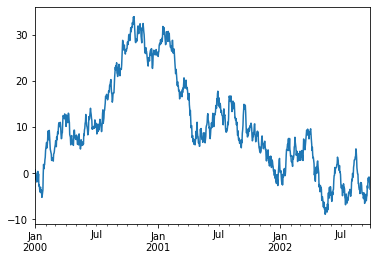

In [65]:
ts = pd.Series(np.random.randn(1000),
                index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

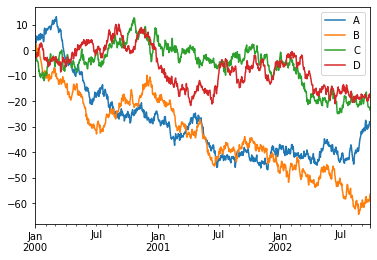

In [66]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                   columns=['A', 'B', 'C', 'D'])
df = df.cumsum()

df.plot()

## Getting data in/out

### CSV

In [67]:
df.to_csv('foo.csv')

In [68]:
pd.read_csv('foo.csv').head()

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.880655,0.499952,-0.739158,-2.017101
1,2000-01-02,2.645782,-0.404038,-2.298572,-2.648886
2,2000-01-03,3.432202,1.261426,-0.546940,-2.999809
3,2000-01-04,3.216694,2.456752,-0.648011,-2.033591
4,2000-01-05,5.227929,1.105422,-2.948140,-2.364278
